In [1]:
from google.colab import drive

# Mount on Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Change directory to project folder
os.chdir("/content/drive/MyDrive/CS547/DeepDiveProject/Dataset")

In [3]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [4]:
# Load working dataset
working_data = pickle.load(open("working_dataset.pkl", "rb"))
working_data

,Date,Gasoline Prices (Dollars per Gallon),Net Imports (Thousand Barrels per Day)
0,1993-04-05/1993-04-11,1.068,7970
1,1993-04-12/1993-04-18,1.079,6990
2,1993-04-19/1993-04-25,1.079,7729
3,1993-04-26/1993-05-02,1.086,8437
4,1993-05-03/1993-05-09,1.086,7086
...,...,...,...
1641,2024-09-16/2024-09-22,3.307,-2798
1642,2024-09-23/2024-09-29,3.311,-2829
1643,2024-09-30/2024-10-06,3.303,-3015
1644,2024-10-07/2024-10-13,3.260,-3412


In [5]:
working_data['Date'] = working_data['Date'].dt.strftime('%Y-%m-%d')

## Visualization of **Gasoline Prices** vs **Time**

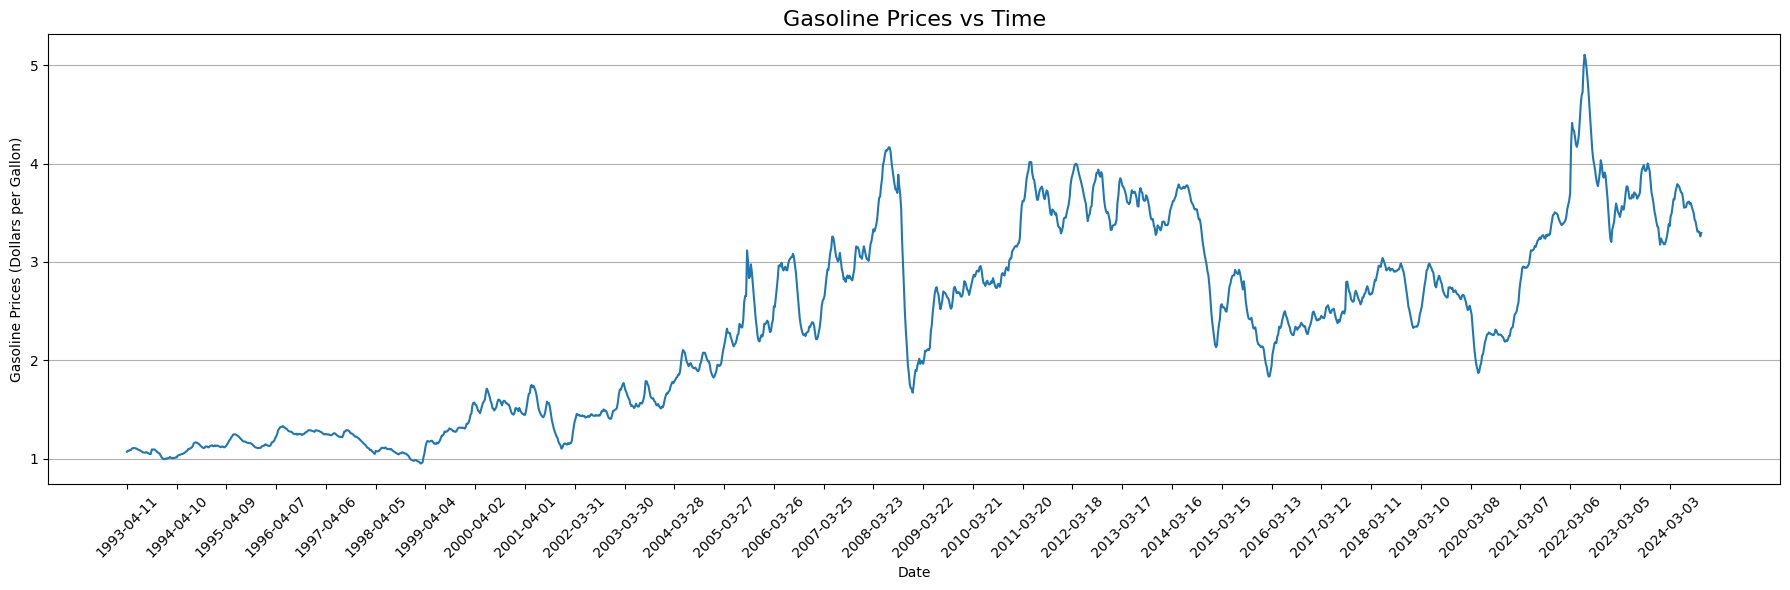

In [6]:
# Select a subset of dates to display, e.g., every 52nd week (each year)
tick_positions = np.arange(0, len(working_data['Date']), 52)
tick_labels = working_data['Date'][tick_positions]

# Plot Gasoline Prices vs. Time
plt.figure(figsize=(18, 6))
plt.plot(working_data['Date'], working_data['Gasoline Prices (Dollars per Gallon)'])
plt.xlabel('Date')
plt.ylabel('Gasoline Prices (Dollars per Gallon)')
plt.title('Gasoline Prices vs Time', fontsize=16)
plt.grid(axis='y')

# Set custom ticks to show every 52nd date only
plt.xticks(tick_positions, tick_labels, rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

The gasoline price chart shows a sharp increase starting around 2004, peaking in 2008 at over $4 per gallon, influenced by factors like the Iraq War, rising demand from emerging economies, and disruptions from Hurricane Katrina in 2005. This upward trend culminated in 2008 with the global financial crisis, which then caused a rapid drop in prices as economic activity slowed and demand decreased. A more recent and notable fluctuation occurred between 2020 and 2023, with prices initially plunging due to the COVID-19 pandemic and lockdowns but sharply rebounding in 2021-2022, peaking in 2022 due to the post-pandemic economic recovery, supply chain constraints, and the impact of the Russia-Ukraine war on global oil supplies.

**Maximum and Minimum Gasoline Prices**

In [11]:
max_gas_price = np.max(working_data['Gasoline Prices (Dollars per Gallon)'])
max_gas_price_idx = np.argmax(working_data['Gasoline Prices (Dollars per Gallon)'])
max_gas_price_date = working_data['Date'][max_gas_price_idx]
print(f"Maximum Gasoline Price: ${max_gas_price} per gallon on {max_gas_price_date}")

Maximum Gasoline Price: 5.107 on 2022-06-19


In [13]:
min_gas_price = np.min(working_data['Gasoline Prices (Dollars per Gallon)'])
min_gas_price_idx = np.argmin(working_data['Gasoline Prices (Dollars per Gallon)'])
min_gas_price_date = working_data['Date'][min_gas_price_idx]
print(f"Minimum Gasoline Price: ${min_gas_price} per gallon on {min_gas_price_date}")

Minimum Gasoline Price: 0.949 on 1999-02-28


## Visualization of **Net Imports of Crude Oil and Petroleum Products** vs **Time**

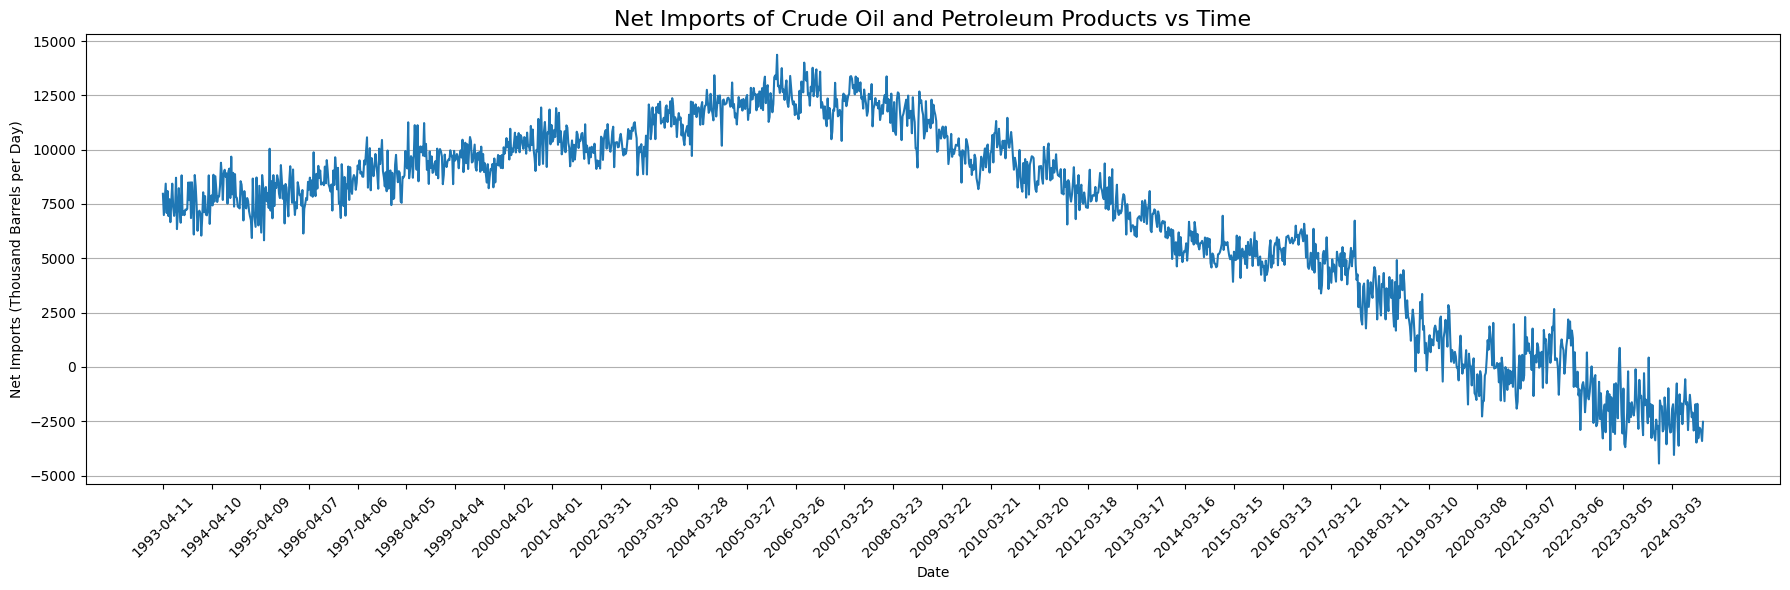

In [15]:
# Select a subset of dates to display, e.g., every 52nd week (each year)
tick_positions = np.arange(0, len(working_data['Date']), 52)
tick_labels = working_data['Date'][tick_positions]

# Plot Net Imports vs. Time
plt.figure(figsize=(18, 6))
plt.plot(working_data['Date'], working_data['Net Imports (Thousand Barrels per Day)'])
plt.xlabel('Date')
plt.ylabel('Net Imports (Thousand Barrels per Day)')
plt.title('Net Imports of Crude Oil and Petroleum Products vs Time', fontsize=16)
plt.grid(axis='y')

# Set custom ticks to show every 52nd date only
plt.xticks(tick_positions, tick_labels, rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

This chart of net imports of crude oil and petroleum products shows a transformation in the U.S. from heavy reliance on imports in the 1990s and early 2000s, peaking around 2005, to a significant decline in imports starting in 2008, reaching near-zero and occasionally negative levels by 2019. This shift is largely due to the U.S. shale oil boom, which increased domestic production through advanced extraction techniques like fracking. The trend reflects the U.S.'s move toward energy independence, with recent stability near zero net imports maintained by sustained domestic production, improved energy efficiency, and strategic shifts in policy, despite fluctuations from events like the COVID-19 pandemic and recent geopolitical tensions.

**Maximum and Minimum Net Imports of Crude Oil and Petroleum Products**

In [16]:
max_net_import = np.max(working_data['Net Imports (Thousand Barrels per Day)'])
max_net_import_idx = np.argmax(working_data['Net Imports (Thousand Barrels per Day)'])
max_net_import_date = working_data['Date'][max_net_import_idx]
print(f"Maximum Net Imports: {max_net_import} thousand barrels per day on {max_net_import_date}")

Maximum Net Imports: 14370 thousand barrels per day on 2005-11-06


In [17]:
min_net_import = np.min(working_data['Net Imports (Thousand Barrels per Day)'])
min_net_import_idx = np.argmin(working_data['Net Imports (Thousand Barrels per Day)'])
min_net_import_date = working_data['Date'][min_net_import_idx]
print(f"Minimum Net Imports: {min_net_import} thousand barrels per day on {min_net_import_date}")

Minimum Net Imports: -4449 thousand barrels per day on 2023-11-26


## Discussion of Data Problem

The main challenge we encountered when processing the data was the misalignment of timelines between gasoline prices and net imports. To address this, we sampled only the overlapping time periods and aggregated the data into weekly intervals to enable seamless merging of the two datasets. This approach maximizes the data size, allowing us to model the relationship between these variables more effectively.